In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import pandas as pd
import io

data = """
"year","month","interest_rate","unemployment","index_price"
2010,1,4.5,8.2,100.0
2010,2,4.4,8.1,102.0
2010,3,4.3,8.0,104.0
2010,4,4.2,7.9,106.0
2010,5,4.1,7.8,108.0
2010,6,4.0,7.7,110.0
2010,7,3.9,7.6,112.0
2010,8,3.8,7.5,114.0
2010,9,3.7,7.4,116.0
2010,10,3.6,7.3,118.0
2010,11,3.5,7.2,120.0
2010,12,3.4,7.1,122.0
2011,1,3.3,7.0,124.0
2011,2,3.2,6.9,126.0
2011,3,3.1,6.8,128.0
2011,4,3.0,6.7,130.0
2011,5,2.9,6.6,132.0
2011,6,2.8,6.5,134.0
2011,7,2.7,6.4,136.0
2011,8,2.6,6.3,138.0
2011,9,2.5,6.2,140.0
2011,10,2.4,6.1,142.0
2011,11,2.3,6.0,144.0
2011,12,2.2,5.9,146.0
2012,1,2.1,5.8,148.0
2012,2,2.0,5.7,150.0
2012,3,1.9,5.6,152.0
2012,4,1.8,5.5,154.0
2012,5,1.7,5.4,156.0
2012,6,1.6,5.3,158.0
2012,7,1.5,5.2,160.0
2012,8,1.4,5.1,162.0
2012,9,1.3,5.0,164.0
2012,10,1.2,4.9,166.0
2012,11,1.1,4.8,168.0
2012,12,1.0,4.7,170.0
"""

# Create a DataFrame from the CSV data
df = pd.read_csv(io.StringIO(data))

print(df.head())

   year  month  interest_rate  unemployment  index_price
0  2010      1            4.5           8.2        100.0
1  2010      2            4.4           8.1        102.0
2  2010      3            4.3           8.0        104.0
3  2010      4            4.2           7.9        106.0
4  2010      5            4.1           7.8        108.0


In [6]:
df.columns

Index(['year', 'month', 'interest_rate', 'unemployment', 'index_price'], dtype='object')

In [7]:
df.drop(columns=['year', 'month'],axis=1,inplace=True)

In [8]:
df.isnull().sum()

interest_rate    0
unemployment     0
index_price      0
dtype: int64

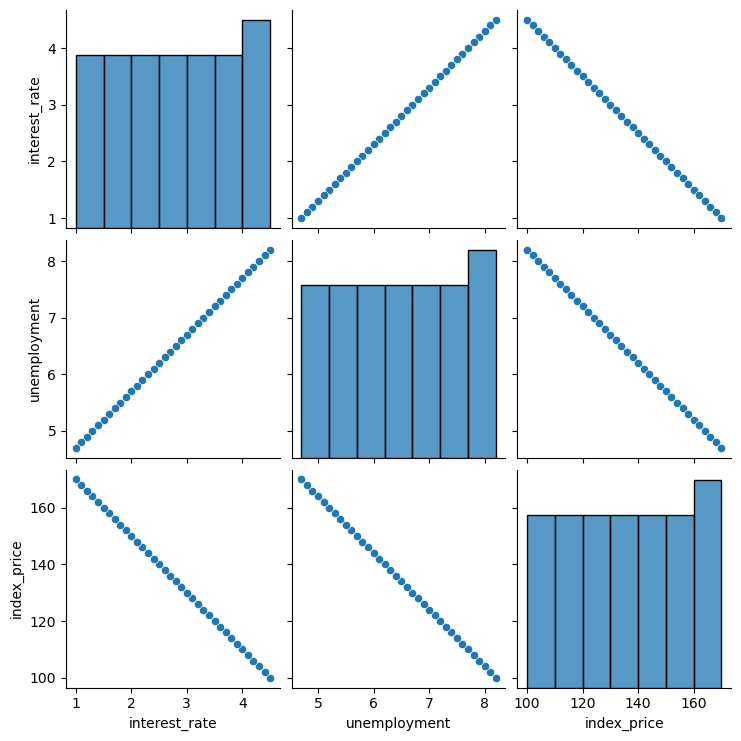

In [10]:
## Lets do some visualization
sns.pairplot(df)

In [11]:
df.corr()

,interest_rate,unemployment,index_price
interest_rate,1.0,1.0,-1.0
unemployment,1.0,1.0,-1.0
index_price,-1.0,-1.0,1.0


Text(0, 0.5, 'unemployment Rate')

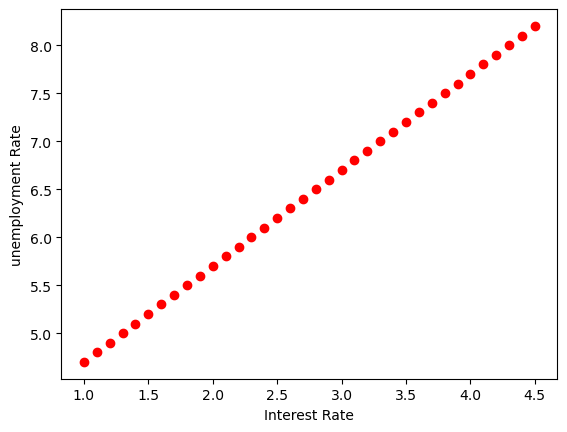

In [13]:
# Visualize the datapoint more closely
plt.scatter(df['interest_rate'],df['unemployment'],color='r')
plt.xlabel("Interest Rate")
plt.ylabel("unemployment Rate")

In [14]:
df.head()

,interest_rate,unemployment,index_price
0,4.5,8.2,100.0
1,4.4,8.1,102.0
2,4.3,8.0,104.0
3,4.2,7.9,106.0
4,4.1,7.8,108.0


In [15]:
## Independent and dependdent feature
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.25,random_state=42)

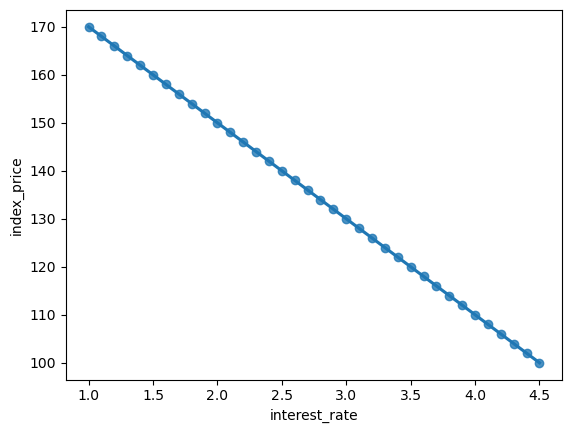

In [19]:
sns.regplot(x='interest_rate',y='index_price',data=df)
plt.show()

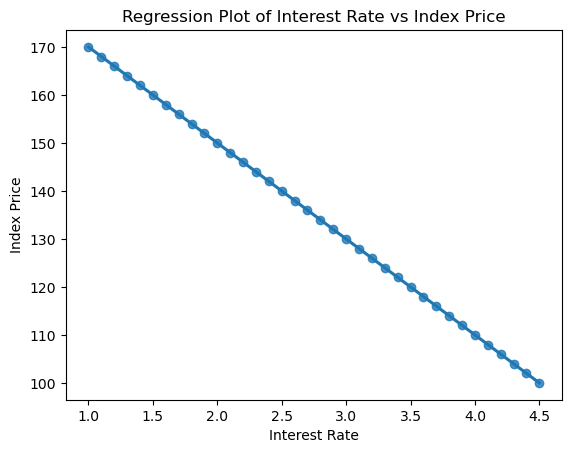

In [20]:
sns.regplot(x='interest_rate', y='index_price', data=df)
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.title('Regression Plot of Interest Rate vs Index Price')
plt.show()

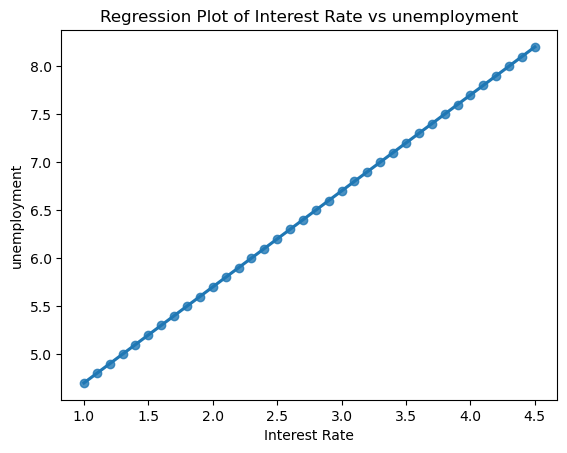

In [21]:
sns.regplot(x='interest_rate', y='unemployment', data=df)
plt.xlabel('Interest Rate')
plt.ylabel('unemployment')
plt.title('Regression Plot of Interest Rate vs unemployment')
plt.show()

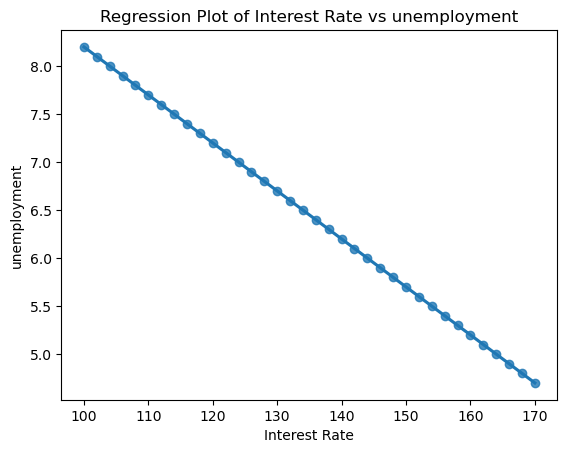

In [23]:
sns.regplot(x='index_price', y='unemployment', data=df)
plt.xlabel('Interest Rate')
plt.ylabel('unemployment')
plt.title('Regression Plot of Interest Rate vs unemployment')
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regression = LinearRegression()

In [33]:
regression.fit(X_train,y_train)

LinearRegression()

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [36]:
## Prediction
y_pred = regression.predict(X_test)

In [37]:
y_pred

array([164.05243075, 113.17128206, 143.23741538, 152.48853332,
       120.10962052, 154.80131281, 131.67351795, 110.85850258,
       101.60738464])

In [39]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [40]:
mse = mean_squared_error(y_test,y_pred)
mse

112.53770992568217

In [41]:
mae = mean_absolute_error(y_test,y_pred)
mae

10.222222222222209

In [42]:
rmse = np.sqrt(mse)
rmse

10.60837923179984

In [43]:
score = r2_score(y_test,y_pred)
score

0.6578245306313718

In [44]:
# Display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.543766040841829

# Assumption

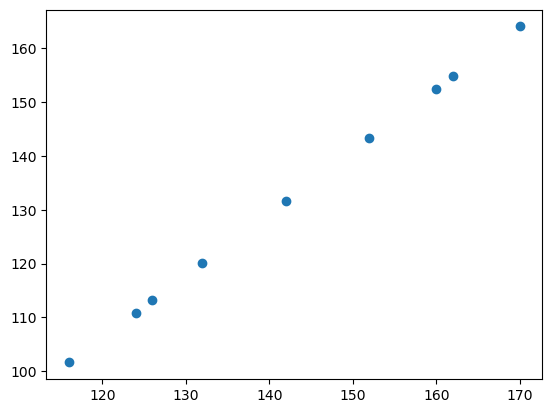

In [45]:
plt.scatter(y_test,y_pred)

In [46]:
residuals = y_test-y_pred

In [47]:
residuals

35     5.947569
13    12.828718
26     8.762585
30     7.511467
16    11.890379
31     7.198687
21    10.326482
12    13.141497
8     14.392615
Name: index_price, dtype: float64

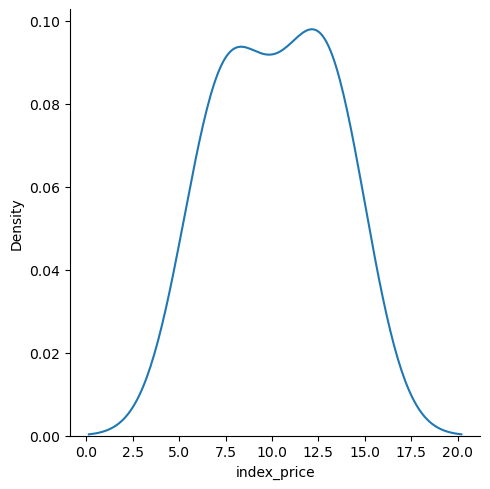

In [48]:
## Plot the residuals
sns.displot(residuals,kind='kde') 

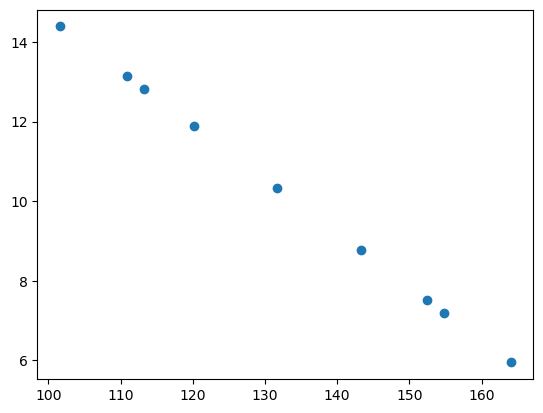

In [49]:
## Scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [50]:
## OLS Linear Regression
import statsmodels.api as sm

In [51]:
model = sm.OLS(y_train,X_train).fit()

In [52]:
model.summary()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1633: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1738: RuntimeWarning: Precision loss occurred in moment calculation due to c

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.024
Model:                            OLS   Adj. R-squared (uncentered):             -0.054
Method:                 Least Squares   F-statistic:                             0.3134
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                       0.734
Time:                        11:26:18   Log-Likelihood:                         -170.24
No. Observations:                  27   AIC:                                      344.5
Df Residuals:                      25   BIC:                                      347.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -10.4857     13.244     -0.792      0.436     -37.763      16.792
x2           -10.4857     13.244     -0.792      0.436     -37.763      16.792
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                     1.87e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.55e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""